# Packt Publishing Test

## Goals :

###  Part I

Scrape the following data from websites:
1.	Title
2.	Date of Publishing

### Part II


1. For each of the publisher, group the books falling under a particular technology
   for example- Java, JavaScript, React, Node, Lego, machine learning, data analysis, and so on. 

2. Understand and compare the technology-wise coverage for each of the publisher. 

3. Identify who has more number of books for a particular technology, and who has lesser books for that tech. Interpret  this data using percentage and weights.


### Part III

Create tree-maps for each of the publisher.


##### Notebook structure
1. Importing libraries.
2. Defining helper functions.
3. Acquiring the data.
4. Determining the group of the books falling under a particular technology. 
5. Understand and compare the technology-wise coverage for each of the publisher.
6. Tree map for particular technology of each of the publisher.






# 1. Importing libraries
Run the following cell to install the needed libraries.

In [9]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import squarify
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from IPython.display import Image

# 2. Defining Helper function

1. get_data()
2. get_word_cloud()
3. get_tree_map()
 

In [10]:
def get_data(url):
    response = requests.get(url)
    content = response.content
    parser = BeautifulSoup(content, 'html.parser')
    return parser

In [484]:
def get_word_cloud(df):
# join titles to a single string
    TitlesDocument = ' '.join(df["Title"])
    no_urls_no_tags = " ".join([word for word in TitlesDocument.split()])
    wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     )
    wordcloud.generate(no_urls_no_tags)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./Titles.png', dpi=300)
    plt.show()

In [50]:
def get_tree_map(df,website):
    

    df = df.set_index("Category")
    df2 = df.sort_values(by="Percentage", ascending=False)

    # treemap parameters
    x = 0.
    y = 0.
    width = 100.
    height = 100.
    cmap = matplotlib.cm.viridis

# color scale on the categories
# min and max values 
    mini, maxi = df2.Percentage.min(), df2.Percentage.max()
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in df2.Percentage]
    colors[1] = "#FBFCFE"

# labels for squares
    
    labels = ["%s\n%s" % (label) for label in zip(df2.index, df2.Category1)]

# make plot
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle(website, fontsize=20)
    ax = fig.add_subplot(111, aspect="equal")
    ax = squarify.plot(df2.Percentage,label=labels, color=colors, ax=ax, alpha=.7)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Categories", fontsize=14)

# color bar
# create dummy invisible image with a color map
    img = plt.imshow([df2.Percentage], cmap=cmap)
    img.set_visible(False)
    fig.colorbar(img, orientation="vertical", shrink=.96)

    fig.text(.76, .9, "Percentage", fontsize=14)
    plt.show()

# 3.  Acquiring the data 

### Acquiring the data for Dummies

In [12]:

Database='http://www.dummies.com/store/Computers-Internet/Database.html'
Graphics_Design_Software_Adobe='http://www.dummies.com/store/Computers-Internet/Graphics-Design-Software/Adobe.html'
Graphics_Design_Software_General='http://www.dummies.com/store/Computers-Internet/Graphics-Design-Software/General.html'
Hardware='http://www.dummies.com/store/Computers-Internet/Hardware.html'
Macintosh="http://www.dummies.com/store/Computers-Internet/Macintosh.html"
Networking="http://www.dummies.com/store/Computers-Internet/Networking.html"
Operating_Systems_Linux="http://www.dummies.com/store/Computers-Internet/Operating-Systems/Linux.html"
Operating_Systems_Windows="http://www.dummies.com/store/Computers-Internet/Operating-Systems/Windows.html"
Programming_General="http://www.dummies.com/store/Computers-Internet/Programming/General.html"
Programming_Java="http://www.dummies.com/store/Computers-Internet/Programming/Java.html"
Programming_Microsoft="http://www.dummies.com/store/Computers-Internet/Programming/Microsoft.html"
Security="http://www.dummies.com/store/Computers-Internet/Security.html"
Software="http://www.dummies.com/store/Computers-Internet/Software.html"
Internet_Business="http://www.dummies.com/store/Computers-Internet/Internet/Business.html"
Internet_eBay="http://www.dummies.com/store/Computers-Internet/Internet/eBay.html"
Internet_General="http://www.dummies.com/store/Computers-Internet/Internet/General.html"
Internet_Social_Networking="http://www.dummies.com/store/Computers-Internet/Internet/Social-Networking.html"
Internet_Software="http://www.dummies.com/store/Computers-Internet/Internet/Software.html"
Internet_Web_Development="http://www.dummies.com/store/Computers-Internet/Internet/Web-Development.html"
Certification="http://www.dummies.com/store/Computers-Internet/Certification.html"

In [13]:
Groups=[Internet_Web_Development,
        Certification,
        Database,
        Graphics_Design_Software_Adobe,
        Graphics_Design_Software_General,
        Hardware, 
        Macintosh,
        Networking,
        Operating_Systems_Linux,
        Operating_Systems_Windows,
        Programming_General,
        Programming_Java, 
        Programming_Microsoft,
        Security,
        Software,
        Internet_Business,
        Internet_eBay,
        Internet_General,
        Internet_Social_Networking,
        Internet_Software ]
List=[]
frame = pd.DataFrame()
for row in Groups:
    DummiesList=[]
    bf = get_data(row).find_all("div",class_="product-listing size80")
    for book in bf:
        title = book.find("div", class_="product-title").find("a").get_text()
        #Category = row
        Tech=row.split("/")[-3]
        Category=row.split("/")[-2]
        Sub_Category=row.split("/")[-1].split(".")[0]
        DummiesList.append((title,Tech,Category,Sub_Category))
    DummiesDataFrame=pd.DataFrame(DummiesList, columns=["Title","Tech","Category","Sub_Category"])
    List.append(DummiesDataFrame)
frame = pd.concat(List)

In [14]:
Dummies= frame[["Title","Sub_Category"]]

In [15]:
Dummies["Publisher"]="Dummies"

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [400]:
Dummies.head(5)

,Title,Sub_Category,Publisher
0,"Active Server Pages For Dummies, 2nd Edition",Web-Development,Dummies
1,Adobe Creative Suite 4 Design Premium All-in-O...,Web-Development,Dummies
2,Adobe Flex 3.0 For Dummies,Web-Development,Dummies
3,BuddyPress For Dummies,Web-Development,Dummies
4,"Building a Web Site For Dummies, 2nd Edition",Web-Development,Dummies


### Acquiring the data for Pragmatic

In [17]:
Mobile_prog="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=mobile_prog&f[skill_level]=All&f[title_contains]="
Audio_books="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=audio_books&f[skill_level]=All&f[title_contains]="
JAVA="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=java_vm&f[skill_level]=All&f[title_contains]="
Beta_books="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=beta&f[skill_level]=All&f[title_contains]="
Career_Development="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=career&f[skill_level]=All&f[title_contains]="
Command_line="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=cmdline&f[skill_level]=All&f[title_contains]="
Cool_things="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=cool_things&f[skill_level]=All&f[title_contains]="
Hardware_DIY="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=diy&f[skill_level]=All&f[title_contains]="
Elixir="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=elixir&f[skill_level]=All&f[title_contains]="
Gaming="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=gaming&f[skill_level]=All&f[title_contains]="
Mac_prog="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=mac&f[skill_level]=All&f[title_contains]="
New_release="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=new&f[skill_level]=All&f[title_contains]="
On_sale="https://pragprog.com/titles?f[sort_by]=pubdate&f[category]=on_sale&f[skill_level]=All&f[title_contains]="

In [18]:
group_pragmetic = [Mobile_prog,
                  Audio_books,
                  JAVA,
                  Beta_books,
                  Career_Development,
                   Command_line,
                   Cool_things,
                   Hardware_DIY,
                   Elixir,
                   Gaming,
                   Mac_prog,
                   New_release,
                   On_sale]

In [19]:
List=[]
frame = pd.DataFrame()
for row in group_pragmetic:
    books = get_data(row).find_all("li", class_="book-cover-item")
    PragmaticList=[]
    for book in books:
        Title=book['data-title']
        date=book['data-pubdate'].replace('&', '')
        Year=(date.split("-")[0])
        Category=row.split("=")[2].split("&")[0]
        PragmaticList.append((Title,date,Year,Category))
    PragmaticDataFrame=pd.DataFrame(PragmaticList, columns=["Title","Date of Publishing","Year","Category"]) 
    List.append(PragmaticDataFrame)
frame = pd.concat(List)

In [20]:
prag=frame[["Title","Category"]]

In [21]:
prag["Publisher"]="Pragmatic"
prag["Sub_Category"]=prag["Category"]
prag=prag.drop(["Category"],axis=1)
prag=prag.drop(["Publisher"],axis=1)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
prag["Publisher"]="Pragmatic"

In [23]:
prag.head(5)

,Title,Sub_Category,Publisher
0,take my money,mobile_prog,Pragmatic
1,programming elixir 1.3,mobile_prog,Pragmatic
2,way of the web tester,mobile_prog,Pragmatic
3,agile web development with rails 5,mobile_prog,Pragmatic
4,build real-time web apps with phoenix,mobile_prog,Pragmatic


In [24]:
NoSt=pd.read_csv("NoStarchDataFrame_clean.csv")

In [25]:
NoSt.columns

Index([u'Unnamed: 0', u'Title', u'Date of Publishing', u'Year', u'Sub_Catgory',
       u'Category'],
      dtype='object')

In [26]:
NoSt=NoSt[["Title","Sub_Catgory"]]

In [27]:
NoSt.head(5)

,Title,Sub_Catgory
0,"Absolute FreeBSD, 2nd Edition",Linux_and_BSD
1,"Absolute OpenBSD, 2nd Edition",Linux_and_BSD
2,Android Security Internals,Hacking_and_Computer_Security
3,Apple Confidential 2.0,Hacking_and_Computer_Security
4,Arduino Playground,Hardware_DIY


In [28]:
NoSt["Sub_Category"]=NoSt["Sub_Catgory"]

In [30]:
del(NoSt["Sub_Catgory"])
NoSt["Publisher"]="NoStarch"

In [31]:
NoSt.head(5)

,Title,Sub_Category,Publisher
0,"Absolute FreeBSD, 2nd Edition",Linux_and_BSD,NoStarch
1,"Absolute OpenBSD, 2nd Edition",Linux_and_BSD,NoStarch
2,Android Security Internals,Hacking_and_Computer_Security,NoStarch
3,Apple Confidential 2.0,Hacking_and_Computer_Security,NoStarch
4,Arduino Playground,Hardware_DIY,NoStarch


In [32]:
All_Publisher = pd.DataFrame()

# 4. Determining the group/category of the books.

### Merge the data of all three publishers

In [33]:
All_Publisher =pd.concat([Dummies,prag,NoSt])

In [106]:
All_Publisher=pd.read_csv("All_Publisher.csv")

In [84]:
get_word_cloud(All_Publisher)

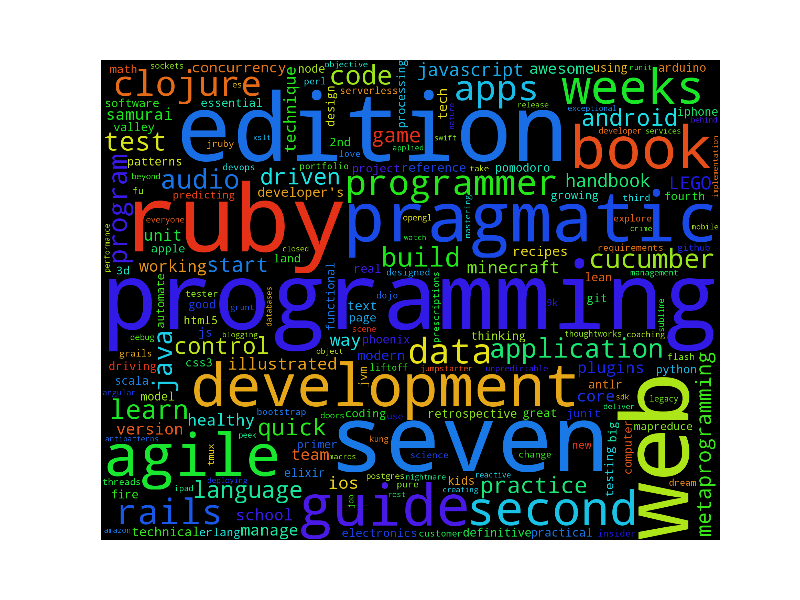

In [86]:
from IPython.display import Image
Image(filename='All_Publisher.png')


In [342]:
All_Publisher=pd.read_csv("All_Publisher.csv")

In [34]:
All_Publisher.head(5)

,Title,Sub_Category,Publisher
0,"Active Server Pages For Dummies, 2nd Edition",Web-Development,Dummies
1,Adobe Creative Suite 4 Design Premium All-in-O...,Web-Development,Dummies
2,Adobe Flex 3.0 For Dummies,Web-Development,Dummies
3,BuddyPress For Dummies,Web-Development,Dummies
4,"Building a Web Site For Dummies, 2nd Edition",Web-Development,Dummies


In [35]:
len(All_Publisher)

2520

In [39]:
All_Publisher["Category"]=All_Publisher["Sub_Category"]
All_Publisher=All_Publisher.drop(["Sub_Category"],axis=1)


In [36]:
All_Publisher.reset_index(level=0,inplace=True)

In [37]:
del(All_Publisher["index"])

In [41]:
List1=[]
List2=[]
List3=[]
List4=[]
for i in range(0,2519):
    List1.append(All_Publisher["Title"].str.lower().str.split()[i][0])
    List2.append(All_Publisher["Title"].str.lower().str.split()[i][1])
    List3.append(All_Publisher["Title"].str.lower().str.split()[i][2])
    List4.append(All_Publisher["Title"].str.lower().str.split()[i][3])

In [42]:
All_Publisher["Category1"] =pd.DataFrame(List1)
All_Publisher["Category2"] =pd.DataFrame(List2)
All_Publisher["Category3"] =pd.DataFrame(List3)
All_Publisher["Category4"] =pd.DataFrame(List4)
All_Publisher=All_Publisher.drop(["Category2,Category3,Category4"],axis=1)

In [44]:
All_Publisher

,Title,Publisher,Category,Category1
0,"Active Server Pages For Dummies, 2nd Edition",Dummies,Web-Development,active
1,Adobe Creative Suite 4 Design Premium All-in-O...,Dummies,Web-Development,adobe
2,Adobe Flex 3.0 For Dummies,Dummies,Web-Development,adobe
3,BuddyPress For Dummies,Dummies,Web-Development,buddypress
4,"Building a Web Site For Dummies, 2nd Edition",Dummies,Web-Development,building
5,"Building a Web Site For Dummies, 3rd Edition",Dummies,Web-Development,building
6,"Building a Web Site For Dummies, 4th Edition",Dummies,Web-Development,building
7,Building Facebook Applications For Dummies®,Dummies,Web-Development,building
8,Building Web Sites All-in-One Desk Reference F...,Dummies,Web-Development,building
9,"Building Websites All-in-One For Dummies, 3rd ...",Dummies,Web-Development,building


In [314]:
#All_Publisher["Category"]=All_Publisher["Title"].str.lower().str.split()
#All_Publisher["Category"]=All_Publisher["Category"].apply(lambda x: [snowball_stemmer.stem(item) for item in x if item not in stop])

## 5. Percentage distribution of different Categories of book of each of the publisher

In [45]:
Final_Dummies=All_Publisher[All_Publisher["Publisher"]=="Dummies"]

In [46]:
Final_Pragmatic_=All_Publisher[All_Publisher["Publisher"]=="Pragmatic"]

In [47]:
Final_Nostarch=All_Publisher[All_Publisher["Publisher"]=="NoStarch"]


In [48]:
DummiesDataFrame_new_Percentage=Final_Dummies.groupby(["Category","Category1"]).size() * 100 / Final_Dummies.shape[0]
DummiesDataFrame_new_Percentage=pd.DataFrame(DummiesDataFrame_new_Percentage)
DummiesDataFrame_new_Percentage.columns=['Percentage']
DummiesDataFrame_new_Percentage

Percentage
Category        Category1                  
Adobe           adobe              2.764977
                building           0.230415
                dreamweaver        0.460829
                flash              0.921659
                illustrator        0.230415
                indesign           0.921659
                macromedia         0.230415
Business        amazon             0.230415
                building           0.230415
                corporate          0.230415
                e-mail             0.230415
                facebook           1.152074
                facebook®          0.230415
                google             0.230415
                google+            0.230415
                kickstarter        0.230415
                landing            0.230415
                local              0.230415
                online             0.230415
                pinterest          0.230415
                professional       0.230415
                search             0.460829
                social             0.691244
                starting           0.460829
Certification   1,001              0.230415
                ccna               0.230415
                cissp              0.460829
                comptia            0.921659
                mcse               0.230415
                pmp                0.230415
...                                     ...
Software        big                0.230415
                bitcoin            0.230415
                blackboard         0.230415
                business           0.230415
                businessobjects    0.230415
                firefox            0.230415
                google             0.230415
                internet           0.230415
                iphone             0.230415
Web-Development active             0.230415
                adobe              0.460829
                buddypress         0.230415
                building           1.382488
                coding             0.460829
                coldfusion         0.230415
                creating           1.152074
                css                0.230415
                css3               0.230415
                dreamweaver        1.152074
Windows         active             0.230415
                cleaning           0.460829
                dos                0.230415
                what's             0.230415
                windows            4.608295
eBay            ebay               2.304147
                ebay.co.uk         0.230415
                ebay®              0.230415
                making             0.230415
                paypal             0.230415
                starting           0.230415

[202 rows x 1 columns]

In [540]:
Final_Pragmatic_.to_csv("Final_Pragmatic_.csv")
Final_Dummies.to_csv("Final_Dummies.csv")
Final_Nostarch.to_csv("Final_Nostarch.csv")

In [541]:
PragmaticDataFrame_new_Percentage.to_csv("Final_Pragmatic_1.csv")
NostarchDataFrame_new_Percentage.to_csv("Final_Nostarch1.csv")
DummiesDataFrame_new_Percentage.to_csv("Final_Dummies1.csv")

In [537]:
PragmaticDataFrame_new_Percentage=Final_Pragmatic_.groupby(["Category","Category1"]).size() * 100 /Final_Pragmatic_.shape[0]
PragmaticDataFrame_new_Percentage=pd.DataFrame(PragmaticDataFrame_new_Percentage)
PragmaticDataFrame_new_Percentage.columns=['Percentage']
PragmaticDataFrame_new_Percentage

Percentage
Category    Category1                
audio_books 101              0.050942
            3d               0.050942
            agile            0.407539
            arduino:         0.050942
            async            0.050942
            automate         0.050942
            behind           0.050942
            beyond           0.050942
            build            0.152827
            clojure          0.050942
            cloud            0.050942
            coding           0.050942
            coffeescript     0.050942
            core             0.101885
            crafting         0.050942
            creating         0.050942
            cucumber         0.254712
            customer         0.050942
            dart             0.050942
            data             0.050942
            debug            0.050942
            definitive       0.101885
            deliver          0.050942
            deploying        0.050942
            designed         0.050942
            developer's      0.101885
            developing       0.050942
            devops           0.050942
            dream            0.050942
            driving          0.050942
...                               ...
on_sale     rails,           0.050942
            rapid            0.050942
            raspberry        0.050942
            reactive         0.050942
            real-world       0.050942
            release          0.050942
            remote           0.050942
            retrospective    0.050942
            ruby             0.101885
            secure           0.050942
            serverless       0.050942
            seven            0.305655
            ship             0.050942
            source           0.050942
            sql              0.050942
            sublime          0.050942
            take             0.050942
            technical        0.050942
            test             0.050942
            test-driven      0.050942
            test-driving     0.050942
            text             0.050942
            thoughtworks     0.050942
            tmux             0.050942
            viml             0.050942
            way              0.050942
            web              0.101885
            working          0.101885
            xslt             0.050942
            your             0.050942

[1274 rows x 1 columns]

In [490]:
NostarchDataFrame_new_Percentage=Final_Nostarch.groupby(["Category","Category1"]).size() * 100 /Final_Nostarch.shape[0]
NostarchDataFrame_new_Percentage=pd.DataFrame(NostarchDataFrame_new_Percentage)
NostarchDataFrame_new_Percentage.columns=['Percentage']
NostarchDataFrame_new_Percentage

Percentage
Category                      Category1              
General                       build          0.813008
                              building       0.813008
                              computers      0.813008
                              create         0.813008
                              ending         0.813008
                              essential      0.813008
                              facebook       0.813008
                              friends        0.813008
                              gnu            0.813008
                              guild          0.813008
Hacking_and_Computer_Security android        0.813008
                              apple          0.813008
                              attacking      0.813008
                              car            0.813008
                              game           0.813008
                              gray           0.813008
                              hacking        2.439024
                              hacking,       0.813008
                              hardware       0.813008
                              ios            0.813008
Hardware_DIY                  arduino        2.439024
                              cisco          0.813008
                              inside         0.813008
Java                          data           0.813008
                              eloquent       0.813008
                              javascript     0.813008
Kids                          blender        0.813008
                              coding         0.813008
                              electronics    0.813008
                              incredible     0.813008
...                                               ...
Linux_and_BSD                 debian         0.813008
                              designing      0.813008
                              freebsd        0.813008
Others                        autotools      0.813008
                              beautiful      0.813008
                              bitcoin        0.813008
                              book           9.756098
                              bug            0.813008
                              growing        0.813008
                              how            1.626016
                              ida            0.813008
                              if             0.813008
Programming                   learn          4.065041
Python                        automate       0.813008
                              black          0.813008
                              doing          0.813008
                              google         0.813008
                              gray           0.813008
                              invent         0.813008
R                             art            0.813008
                              book           0.813008
Ruby                          book           0.813008
art_and_design                art            4.065041
                              artist's       0.813008
                              build          0.813008
                              clojure        0.813008
                              code           0.813008
                              cs             0.813008
                              cult           3.252033
                              game           1.626016

[75 rows x 1 columns]

# Pragmatic tree_map

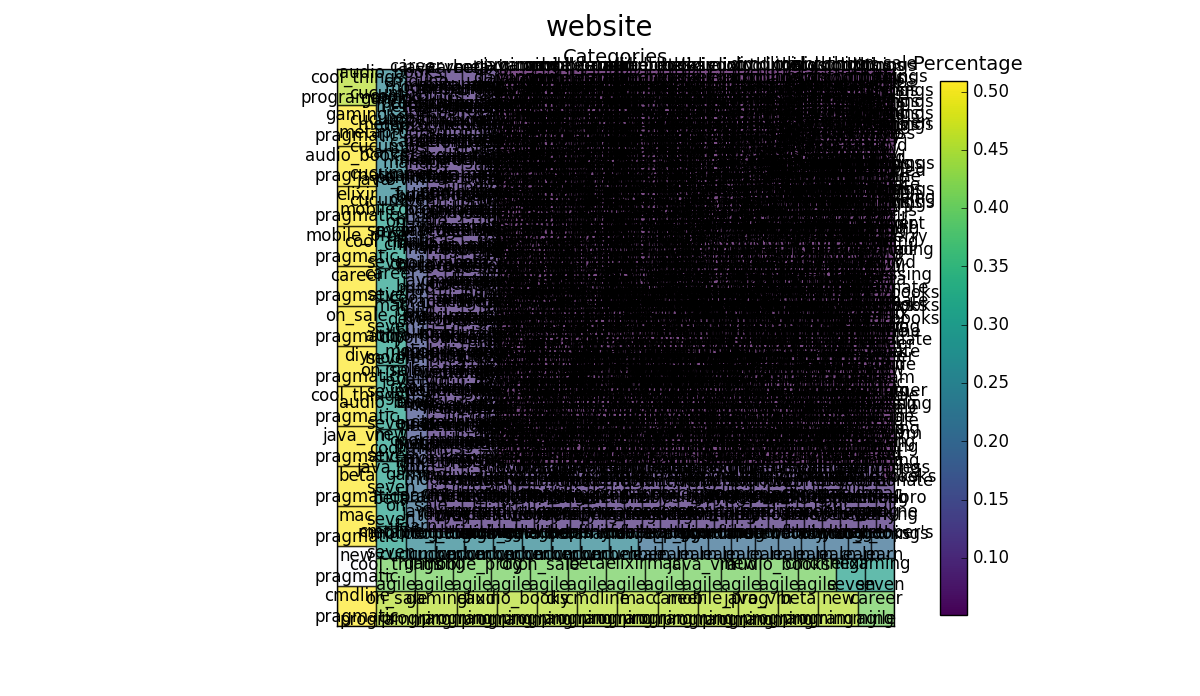

In [3]:
website="Pragmatic"
get_tree_map(PragmaticDataFrame_new_Percentage,website)
Image(filename='Treefigure_1.png')

# NoStarch Treemap

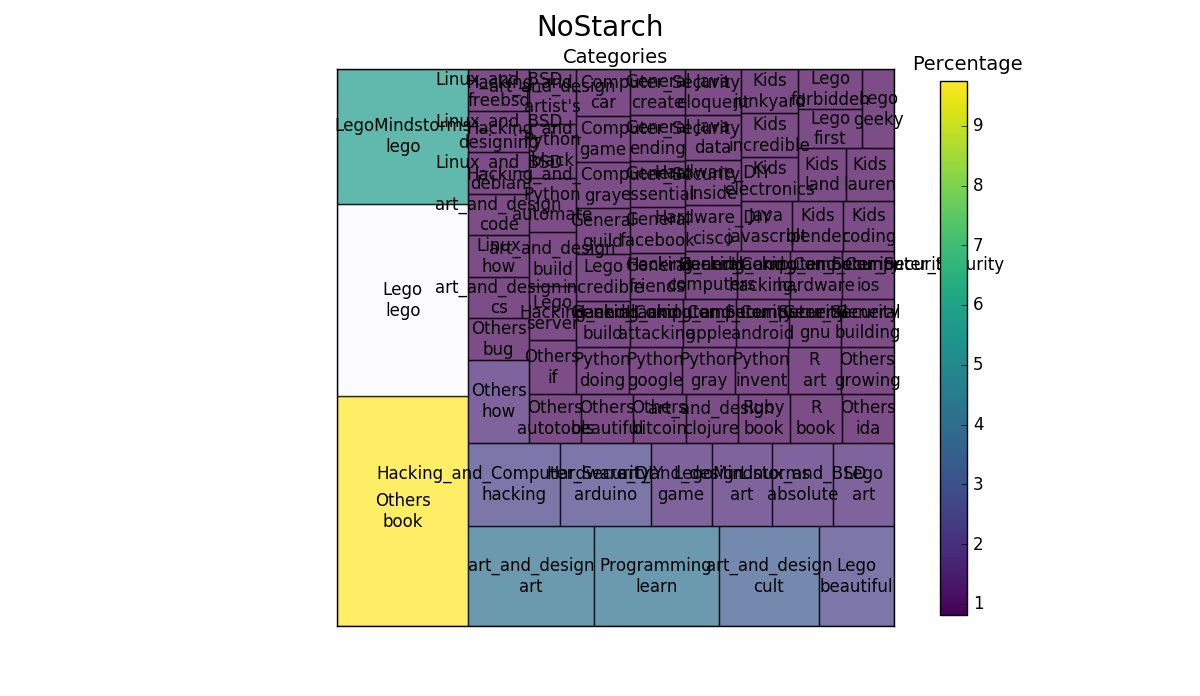

In [4]:
website="NoStarch"
get_tree_map(NostarchDataFrame_new_Percentage,website)
Image(filename='figure_2.png')

In [53]:
DummiesDataFrame_new_Percentage.

UnicodeEncodeError: 'ascii' codec can't encode character u'\xae' in position 8: ordinal not in range(128)

In [51]:
website="Dummies"
get_tree_map(DummiesDataFrame_new_Percentage,website)


KeyError: 'Category'

In [ ]:
Image(filename='figure_2.png')